# Analyzing Customer Transactions in Online Retail: A Data-Driven Exploration of Sales Patterns and Consumer Behavior

This dataset contains information on customers' demographics, purchase behavior, and preferences. The dataset has 65,796 records, each with 12 variables, including customer ID, age, gender, total revenue, number of purchases, purchase date, purchase value, payment method, time spent on the website, browser used, newsletter subscription, and voucher usage. As a data analyst, we will explore this dataset to understand customers' behavior and preferences and provide insights that could help improve the business's overall performance.

This analysis will answer the following business questions:
1. What are the age group and gender of the majority of the customers?

2. What is the most preferred payment method among customers? And how many customers use vouchers as a payment method?

3. What is the peak period for revenues and purchases at the retail shop? Also define some key performance indicators (KPIs) such as total revenues, average purchase value, and total purchases.

4. What are customers' browser preferences, website engagement, and newsletter subscriptions and how do these subscriptions impact spending behavior? A correlation analysis.

Firstly, we will import the necessary libraries, namely: Numpy, Pandas, and Matplotlib.


In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

In [87]:
# load the data into pandas dataframe
online_shop = pd.read_csv('Online Shop Customer Sales Data.csv')

After loading the data into a Pandas dataframe, we can proceed to analyze and explore the dataset.

In [88]:
online_shop.head()

,Customer_id,Age,Gender,Revenue_Total,N_Purchases,Purchase_DATE,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher
0,504308,53,0,45.3,2,22.06.21,24.915,1,885,0,0,0
1,504309,18,1,36.2,3,10.12.21,2.896,2,656,0,0,1
2,504310,52,1,10.6,1,14.03.21,10.600,0,761,0,1,0
3,504311,29,0,54.1,5,25.10.21,43.280,1,906,0,1,0
4,504312,21,1,56.9,1,14.09.21,56.900,1,605,0,1,0


In [89]:
online_shop.tail()

,Customer_id,Age,Gender,Revenue_Total,N_Purchases,Purchase_DATE,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher
65791,570099,30,1,10.9,4,15.02.21,6.213,1,894,0,0,0
65792,570100,33,0,29.3,1,05.02.21,29.300,0,722,0,0,0
65793,570101,50,0,25.4,5,29.10.21,23.114,3,424,0,0,0
65794,570102,56,0,29.2,1,09.12.21,29.200,3,731,0,0,0
65795,570103,25,0,5.3,2,23.10.21,2.968,0,820,0,0,0


In [90]:
# Display the number of rows and columns
online_shop.shape

(65796, 12)

In [91]:
# Provide basic info about the dataframe
online_shop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65796 entries, 0 to 65795
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Customer_id     65796 non-null  int64  
 1   Age             65796 non-null  int64  
 2   Gender          65796 non-null  int64  
 3   Revenue_Total   65796 non-null  float64
 4   N_Purchases     65796 non-null  int64  
 5   Purchase_DATE   65796 non-null  object 
 6   Purchase_VALUE  65796 non-null  float64
 7   Pay_Method      65796 non-null  int64  
 8   Time_Spent      65796 non-null  int64  
 9   Browser         65796 non-null  int64  
 10  Newsletter      65796 non-null  int64  
 11  Voucher         65796 non-null  int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 6.0+ MB


In [92]:
# show statistical summary of the data
online_shop.describe()

,Customer_id,Age,Gender,Revenue_Total,N_Purchases,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher
count,65796.000000,65796.000000,65796.000000,65796.000000,65796.000000,65796.000000,65796.000000,65796.000000,65796.000000,65796.000000,65796.000000
mean,537205.500000,39.592696,0.671348,27.732935,3.992477,15.968699,1.308651,598.925603,0.630935,0.151027,0.250258
std,18993.813493,13.825466,0.469727,14.941878,2.004370,13.229295,1.081959,277.833635,0.996407,0.358078,0.433165
min,504308.000000,16.000000,0.000000,0.500000,1.000000,0.005000,0.000000,120.000000,0.000000,0.000000,0.000000
25%,520756.750000,28.000000,0.000000,15.300000,2.000000,4.819750,0.000000,358.000000,0.000000,0.000000,0.000000
50%,537205.500000,40.000000,1.000000,30.100000,4.000000,12.640000,1.000000,598.000000,0.000000,0.000000,0.000000
75%,553654.250000,51.000000,1.000000,37.600000,6.000000,24.752000,2.000000,840.000000,1.000000,0.000000,1.000000
max,570103.000000,63.000000,1.000000,59.900000,7.000000,59.900000,3.000000,1080.000000,3.000000,1.000000,1.000000


After loading the data into pandas dataframe, the next step is to inspect the data for any null values, duplicates. In case any of these issues are present, we will perform the necessary operations to correct or remove them

In [93]:
# Check for null values
online_shop.isnull().any()

Customer_id       False
Age               False
Gender            False
Revenue_Total     False
N_Purchases       False
Purchase_DATE     False
Purchase_VALUE    False
Pay_Method        False
Time_Spent        False
Browser           False
Newsletter        False
Voucher           False
dtype: bool

In [94]:
# Sum up all the null values in each column
online_shop.isnull().sum()

Customer_id       0
Age               0
Gender            0
Revenue_Total     0
N_Purchases       0
Purchase_DATE     0
Purchase_VALUE    0
Pay_Method        0
Time_Spent        0
Browser           0
Newsletter        0
Voucher           0
dtype: int64

In [95]:
# inspect and sum the duplicates in the dataframe
online_shop.duplicated().sum()

0

In [96]:
#inspect the dataframe for duplicates
online_shop.duplicated().any()

False

Based on the performed operations on the data, it is apparent that there are no duplicates or null values present. Moving forward, we will begin answering the aforementioned questions. Additionally, we will make a copy of the data to ensure that the original dataset remains unchanged in case of data loss or changes

In [97]:
# Make a copy of the original data
online_shop_copy = online_shop.copy()

In [98]:
online_shop_copy.head()

,Customer_id,Age,Gender,Revenue_Total,N_Purchases,Purchase_DATE,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher
0,504308,53,0,45.3,2,22.06.21,24.915,1,885,0,0,0
1,504309,18,1,36.2,3,10.12.21,2.896,2,656,0,0,1
2,504310,52,1,10.6,1,14.03.21,10.600,0,761,0,1,0
3,504311,29,0,54.1,5,25.10.21,43.280,1,906,0,1,0
4,504312,21,1,56.9,1,14.09.21,56.900,1,605,0,1,0


**QUESTION 1**: What is the age group and gender of the majority of the customers?

In [99]:
# Define function to  map gender code to actual gender
def gender(x):
    if x == 1:
        return "female"
    else:
        return "male"


# Apply the function to create a new column 'Gender_Class' 
online_shop_copy['Gender_Class'] = online_shop_copy['Gender'].apply(gender)

# Define the age group bins and labels
bin_edges = [16, 30, 50, 64]
labels = ['Young Adult (16-29)', 'Adult (30-49)', 'Middle-Aged (50-63)']

# Bin the 'Age' column into the defined age groups and create a new column 'Age_Group'
online_shop_copy['Age_Group'] = pd.cut(online_shop_copy['Age'], bins=bin_edges, labels=labels, include_lowest=True, right=False)
online_shop_copy


    

,Customer_id,Age,Gender,Revenue_Total,N_Purchases,Purchase_DATE,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher,Gender_Class,Age_Group
0,504308,53,0,45.3,2,22.06.21,24.915,1,885,0,0,0,male,Middle-Aged (50-63)
1,504309,18,1,36.2,3,10.12.21,2.896,2,656,0,0,1,female,Young Adult (16-29)
2,504310,52,1,10.6,1,14.03.21,10.600,0,761,0,1,0,female,Middle-Aged (50-63)
3,504311,29,0,54.1,5,25.10.21,43.280,1,906,0,1,0,male,Young Adult (16-29)
4,504312,21,1,56.9,1,14.09.21,56.900,1,605,0,1,0,female,Young Adult (16-29)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65791,570099,30,1,10.9,4,15.02.21,6.213,1,894,0,0,0,female,Adult (30-49)
65792,570100,33,0,29.3,1,05.02.21,29.300,0,722,0,0,0,male,Adult (30-49)
65793,570101,50,0,25.4,5,29.10.21,23.114,3,424,0,0,0,male,Middle-Aged (50-63)
65794,570102,56,0,29.2,1,09.12.21,29.200,3,731,0,0,0,male,Middle-Aged (50-63)


In [100]:
# Group the dataframe by the Age_Group' column and count the number of customers in each group
age_category = online_shop_copy.groupby('Age_Group')['Customer_id'].count()
age_category_sorted = age_category.sort_values(ascending=False)
age_category_sorted

Age_Group
Adult (30-49)          27505
Middle-Aged (50-63)    19268
Young Adult (16-29)    19023
Name: Customer_id, dtype: int64

In [101]:
# Count the number of both male and female customers
gender = online_shop_copy['Gender_Class'].value_counts()
gender_sorted = gender.sort_values(ascending=False)
gender_sorted

female    44172
male      21624
Name: Gender_Class, dtype: int64

In [102]:
# determine the total number of customers
total_customers = online_shop_copy.shape[0]
total_customers

65796

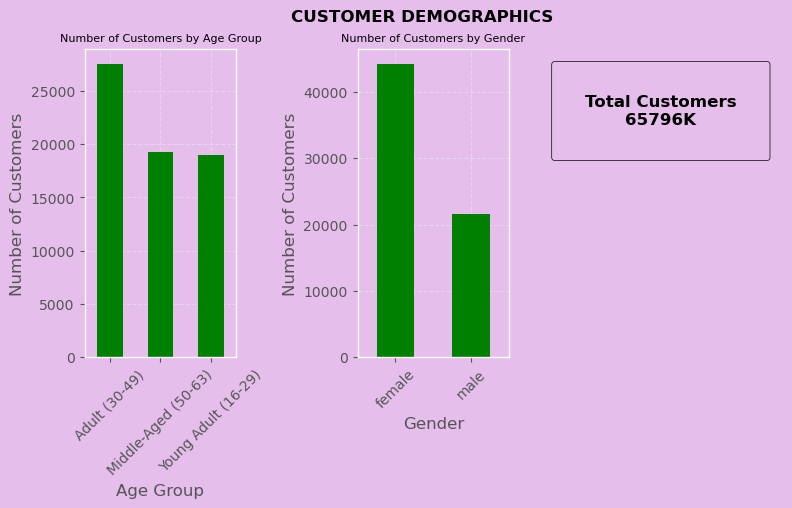

In [103]:
# Set the style for the plots
plt.style.use('ggplot')

# Create the figure with 3 subplots
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(9,4))

# Plot number of customers by gender as a bar chart
age_category_sorted.plot(kind='bar', ax=ax[0], color='green') 
ax[0].set_xlabel('Age Group')
ax[0].set_ylabel('Number of Customers')
ax[0].set_title('Number of Customers by Age Group', fontsize=8)
ax[0].set_xticklabels(age_category_sorted.index, rotation=45)
ax[0].set_facecolor('#E5BEEC')
ax[0].grid('x', linestyle='--', alpha=0.3)

# Plot number of customers by gender as a bar chart
gender_sorted.plot(kind='bar', ax=ax[1], color='green')
ax[1].set_xlabel('Gender')
ax[1].set_ylabel('Number of Customers')
ax[1].set_title('Number of Customers by Gender', fontsize=8)
ax[1].set_xticklabels(gender_sorted.index, rotation=45)
ax[1].set_facecolor('#E5BEEC')
ax[1].grid('x', linestyle='--', alpha=0.3)

# Add a text box to display the total number of customers
ax[2].text(0.2, 0.8, f'Total Customers\n{str(total_customers)}'+'K', ha='center', va='center', fontsize=12, fontweight='bold', bbox= dict(facecolor='#E5BEEC', edgecolor='black', boxstyle='round, pad=2, rounding_size=0.2'))
ax[2].axis('off')

# Customize the layout of the figure
fig.subplots_adjust(wspace=0.8)
fig.suptitle('CUSTOMER DEMOGRAPHICS', fontsize=12, fontweight='bold')
fig.patch.set_facecolor('#E5BEEC')


**ANSWER**: According to the displayed dashboard, the data reveals that there are a total of **65.8K** customers. The age distribution of the customers majority of them are  **adults** aged 30-49, with **27.5K** customers in this range. Additionally, gender-wise, the majority of the customers are **female**, with a total count of **44.2K**.

**QUESTION 2**: What is the most preferred payment method among customers? And how many customers use vouchers as a payment method?

In [104]:
online_shop_copy

,Customer_id,Age,Gender,Revenue_Total,N_Purchases,Purchase_DATE,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher,Gender_Class,Age_Group
0,504308,53,0,45.3,2,22.06.21,24.915,1,885,0,0,0,male,Middle-Aged (50-63)
1,504309,18,1,36.2,3,10.12.21,2.896,2,656,0,0,1,female,Young Adult (16-29)
2,504310,52,1,10.6,1,14.03.21,10.600,0,761,0,1,0,female,Middle-Aged (50-63)
3,504311,29,0,54.1,5,25.10.21,43.280,1,906,0,1,0,male,Young Adult (16-29)
4,504312,21,1,56.9,1,14.09.21,56.900,1,605,0,1,0,female,Young Adult (16-29)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65791,570099,30,1,10.9,4,15.02.21,6.213,1,894,0,0,0,female,Adult (30-49)
65792,570100,33,0,29.3,1,05.02.21,29.300,0,722,0,0,0,male,Adult (30-49)
65793,570101,50,0,25.4,5,29.10.21,23.114,3,424,0,0,0,male,Middle-Aged (50-63)
65794,570102,56,0,29.2,1,09.12.21,29.200,3,731,0,0,0,male,Middle-Aged (50-63)


In [105]:
# This function maps the payment method codes to their respective names
def payment_option(x):
    if x == 0:
        return 'Digital Wallets'
    elif x == 1:
        return 'Card'
    elif x == 2:
        return 'PayPal'
    else:
        return 'Other'

# Apply the payment_option function to the 'Pay_Method' column and create a new column 'Pay_Method_Class'
online_shop_copy['Pay_Method_Class'] = online_shop_copy['Pay_Method'].apply( payment_option)

# Display the updated dataframe
online_shop_copy

,Customer_id,Age,Gender,Revenue_Total,N_Purchases,Purchase_DATE,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher,Gender_Class,Age_Group,Pay_Method_Class
0,504308,53,0,45.3,2,22.06.21,24.915,1,885,0,0,0,male,Middle-Aged (50-63),Card
1,504309,18,1,36.2,3,10.12.21,2.896,2,656,0,0,1,female,Young Adult (16-29),PayPal
2,504310,52,1,10.6,1,14.03.21,10.600,0,761,0,1,0,female,Middle-Aged (50-63),Digital Wallets
3,504311,29,0,54.1,5,25.10.21,43.280,1,906,0,1,0,male,Young Adult (16-29),Card
4,504312,21,1,56.9,1,14.09.21,56.900,1,605,0,1,0,female,Young Adult (16-29),Card
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65791,570099,30,1,10.9,4,15.02.21,6.213,1,894,0,0,0,female,Adult (30-49),Card
65792,570100,33,0,29.3,1,05.02.21,29.300,0,722,0,0,0,male,Adult (30-49),Digital Wallets
65793,570101,50,0,25.4,5,29.10.21,23.114,3,424,0,0,0,male,Middle-Aged (50-63),Other
65794,570102,56,0,29.2,1,09.12.21,29.200,3,731,0,0,0,male,Middle-Aged (50-63),Other


In [106]:
# Get the count of each payment option from the data and sort them in descending order
pay_option = online_shop_copy['Pay_Method_Class'].value_counts()
pay_option_sorted = pay_option.sort_values(ascending=False)
pay_option_sorted

Card               19754
Digital Wallets    19075
PayPal             14551
Other              12416
Name: Pay_Method_Class, dtype: int64

In [107]:
# Get the counts of voucher usage and display them
voucher_count = online_shop_copy['Voucher'].value_counts()
voucher_count

0    49330
1    16466
Name: Voucher, dtype: int64

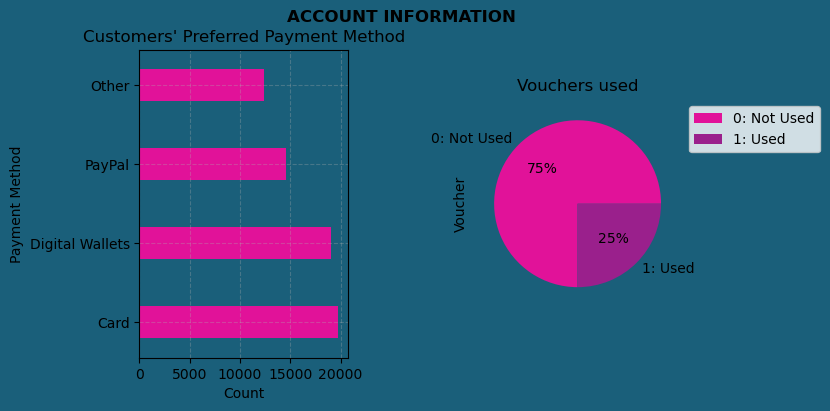

In [108]:
# Set the style for the plots
plt.style.use('default')

# Create a figure with two subplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 4))

# Create horizontal bar chart for payment method
pay_option_sorted.plot(kind='barh', ax=ax[0], width=0.4, color='#E11299' )
ax[0].set_xlabel('Count')
ax[0].set_ylabel('Payment Method')
ax[0].set_title('Customers\' Preferred Payment Method')
ax[0].set_facecolor('#1A5F7A')
ax[0].grid('x', linestyle='--', alpha=0.3)

# Create pie chart for voucher usage
colors = ['#E11299', '#9A208C']
voucher_count.plot(kind='pie', ax=ax[1], labels=['0: Not Used', '1: Used'], autopct="%1.0f%%", colors=colors)
ax[1].legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
ax[1].set_title('Vouchers used')

#customize the layout of the figure
fig.subplots_adjust(wspace=0.6)
fig.suptitle('ACCOUNT INFORMATION', fontsize=12, fontweight='bold')
fig.patch.set_facecolor('#1A5F7A')

**ANSWER**: **Card** is the most preferred payment method with **19.8K** customers using it.  The second most popular payment method is **Digital Wallets** with **19.08K** customers adopting this option. However, the usage of vouchers as a payment method is relatively low with only **25%** of the customers (**16.5K**) using this option.

**QUESTION 3**: What is the peak period for revenues and purchases at the retail shop? Also define some key performance indicators (KPIs) such as total revenues, average purchase value, and total purchases 

In [109]:
online_shop_copy

,Customer_id,Age,Gender,Revenue_Total,N_Purchases,Purchase_DATE,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher,Gender_Class,Age_Group,Pay_Method_Class
0,504308,53,0,45.3,2,22.06.21,24.915,1,885,0,0,0,male,Middle-Aged (50-63),Card
1,504309,18,1,36.2,3,10.12.21,2.896,2,656,0,0,1,female,Young Adult (16-29),PayPal
2,504310,52,1,10.6,1,14.03.21,10.600,0,761,0,1,0,female,Middle-Aged (50-63),Digital Wallets
3,504311,29,0,54.1,5,25.10.21,43.280,1,906,0,1,0,male,Young Adult (16-29),Card
4,504312,21,1,56.9,1,14.09.21,56.900,1,605,0,1,0,female,Young Adult (16-29),Card
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65791,570099,30,1,10.9,4,15.02.21,6.213,1,894,0,0,0,female,Adult (30-49),Card
65792,570100,33,0,29.3,1,05.02.21,29.300,0,722,0,0,0,male,Adult (30-49),Digital Wallets
65793,570101,50,0,25.4,5,29.10.21,23.114,3,424,0,0,0,male,Middle-Aged (50-63),Other
65794,570102,56,0,29.2,1,09.12.21,29.200,3,731,0,0,0,male,Middle-Aged (50-63),Other


In [110]:
# convert Purchase_DATE column to datetime format and extract the month
online_shop_copy['Purchase_Month'] = pd.to_datetime(online_shop_copy['Purchase_DATE']).dt.month_name()

In [111]:
# Retrieve unique values in the Purchase Month column
online_shop_copy['Purchase_Month'].unique()

array(['June', 'October', 'March', 'September', 'May', 'April',
       'December', 'November', 'February', 'July', 'January', 'August'],
      dtype=object)

In [112]:
# Group the online_shop_copy DataFrame by 'Purchase_Month' and sum the 'Revenue_Total' and 'N_Purchases' 
peak_month = online_shop_copy.groupby('Purchase_Month')[['Revenue_Total', 'N_Purchases']].sum().reset_index()
peak_month

,Purchase_Month,Revenue_Total,N_Purchases
0,April,150555.0,21740
1,August,157115.4,22428
2,December,157300.8,22449
3,February,139984.8,20080
4,January,155268.0,22582
5,July,153629.6,22069
6,June,151084.0,21771
7,March,152954.1,21790
8,May,154563.4,22460
9,November,148604.4,21315


In [113]:
#calculate the average of the purchase value and round off the result to 2 decimal places
avg_purchase_value = round(online_shop_copy['Purchase_VALUE'].aggregate(np.mean), 2)
avg_purchase_value 

15.97

In [114]:
#calculate the total revenues for the year and round off the result to 2 decimal places
total_revenue = round(online_shop_copy['Revenue_Total'].sum(), 2)
total_revenue

1824716.2

In [115]:
#Convert result to millions and round off to 2 decimal places
total_revenue_m = round((total_revenue/1000000), 2)
total_revenue_m

1.82

In [116]:
#calculate the total purchases for the year 
total_purchases = online_shop_copy['N_Purchases'].sum()
total_purchases

262689

In [117]:
# Convert the result to thousand and round off to  2 decimal places
total_purchases_k = round((total_purchases/1000), 2)
total_purchases_k

262.69

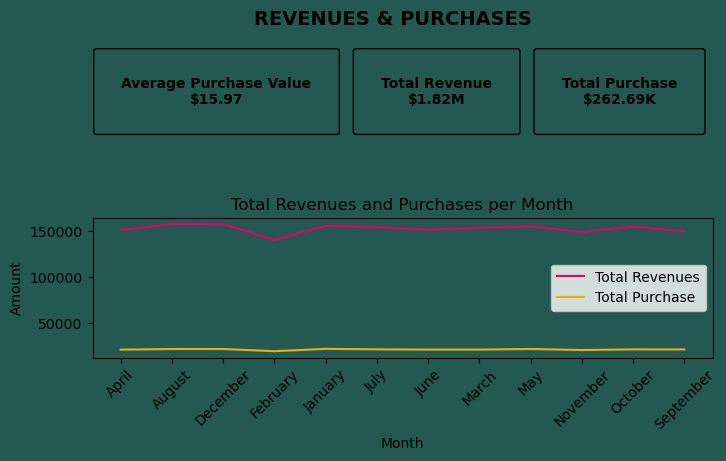

In [118]:
# create a figure with 2 subplots
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8, 4))

# Display the Average Purchase Value
ax[0].text(0.2,0.7, f"Average Purchase Value\n{'$'+str(avg_purchase_value) }", ha='center', va='center', fontsize=10, fontweight='bold', bbox=dict(facecolor='#245953', edgecolor='black', boxstyle='round,pad=2, rounding_size=0.2')) 

# Display the Total Revenue generated
ax[0].text(0.555,0.7, f"Total Revenue\n{'$'+str(total_revenue_m)+'M'}", ha='center', va='center', fontsize=10, fontweight='bold', bbox=dict(facecolor='#245953', edgecolor='black',  boxstyle='round, pad=2, rounding_size=0.2'))

# Display the total number of items purchased
ax[0].text(0.85,0.7, f"Total Purchase\n{'$'+str(total_purchases_k)+'K'}", ha='center', va='center', fontsize=10, fontweight='bold', bbox=dict(facecolor='#245953', edgecolor='black', boxstyle='round, pad=2, rounding_size=0.2'))
ax[0].set_facecolor('#245953')

# Hide the axis
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)
ax[0].spines['left'].set_visible(False)

# Plot the line chart for the Peak Periods
ax[1].plot(peak_month['Purchase_Month'], peak_month['Revenue_Total'], color='#E90064', label= 'Total Revenues')
ax[1].plot(peak_month['Purchase_Month'], peak_month['N_Purchases'], color='#E7B10A', label= 'Total Purchase')
ax[1].set_xlabel('Month')
ax[1].set_ylabel('Amount')
ax[1].set_title('Total Revenues and Purchases per Month')
ax[1].legend()
ax[1].set_xticks(range(len(peak_month)))
ax[1].set_xticklabels(peak_month['Purchase_Month'], rotation=45,);
ax[1].set_facecolor('#245953')

# Customize the layout of the figure
fig.suptitle('REVENUES & PURCHASES', fontsize=14, fontweight='bold')
fig.patch.set_facecolor('#245953')


**ANSWER**: The peak period for both **revenues** and **purchases** at the retail shop is **January**, with a revenue of `$159.97K` and total purchases of 23.2K. May and October follow closely. The retail shop also recorded annual total revenue of `$1.82M`, total purchases of 267K, and an average purchase value of `$15.67`

**QUESTION 4**: What are customers' browser preferences, website engagement, and newsletter subscriptions and how do these subscriptions impact spending behavior? A correlation analysis.

In [119]:
 online_shop_copy

,Customer_id,Age,Gender,Revenue_Total,N_Purchases,Purchase_DATE,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher,Gender_Class,Age_Group,Pay_Method_Class,Purchase_Month
0,504308,53,0,45.3,2,22.06.21,24.915,1,885,0,0,0,male,Middle-Aged (50-63),Card,June
1,504309,18,1,36.2,3,10.12.21,2.896,2,656,0,0,1,female,Young Adult (16-29),PayPal,October
2,504310,52,1,10.6,1,14.03.21,10.600,0,761,0,1,0,female,Middle-Aged (50-63),Digital Wallets,March
3,504311,29,0,54.1,5,25.10.21,43.280,1,906,0,1,0,male,Young Adult (16-29),Card,October
4,504312,21,1,56.9,1,14.09.21,56.900,1,605,0,1,0,female,Young Adult (16-29),Card,September
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65791,570099,30,1,10.9,4,15.02.21,6.213,1,894,0,0,0,female,Adult (30-49),Card,February
65792,570100,33,0,29.3,1,05.02.21,29.300,0,722,0,0,0,male,Adult (30-49),Digital Wallets,May
65793,570101,50,0,25.4,5,29.10.21,23.114,3,424,0,0,0,male,Middle-Aged (50-63),Other,October
65794,570102,56,0,29.2,1,09.12.21,29.200,3,731,0,0,0,male,Middle-Aged (50-63),Other,September


In [120]:
# Determine the average time spent(in seconds) by customers on transactions
avg_Time_Spent = online_shop_copy['Time_Spent'].mean()
avg_Time_Spent

598.9256033801447

In [121]:
# Round the result to the nearest whole number
avg_Time_Spent_rounded = round(avg_Time_Spent)
avg_Time_Spent_rounded

599

In [122]:
# Create a new column and replace the 'Browser' column values with their corresponding browser names
online_shop_copy['Browser_Name'] = online_shop_copy['Browser'].replace({0:'Chrome', 1:'Safari', 2:'Edge', 3:'Other'})

#Group the dataframe by the 'Browser_Name' column and perform the required aggregations
preferred_browser = online_shop_copy.groupby('Browser_Name').agg({'Customer_id':'nunique','Revenue_Total':'sum',  'N_Purchases':'sum', 'Time_Spent':'mean'}).reset_index()
preferred_browser

,Browser_Name,Customer_id,Revenue_Total,N_Purchases,Time_Spent
0,Chrome,42076,1170288.6,167532,598.151488
1,Edge,3377,92303.2,13550,600.182114
2,Other,7208,200156.7,29151,599.022475
3,Safari,13135,361967.7,52456,601.029159


In [123]:
# Determine the number of customers who subscribed (0: not subscribed, 1: subscribed) to the retail shop's newsletter
newsletter_subscribers = online_shop_copy['Newsletter'].value_counts()
newsletter_subscribers

0    55859
1     9937
Name: Newsletter, dtype: int64

Next, we will investigate whether subscribing to the retail shop's newsletter influence the customers' spending behavior, in terms of both revenue and number of purchases.

In [124]:
# Group the dataframe by the 'Newsletter' column (0: not subscribed, 1: subscribed) and calculate the total revenue and total purchases
newsletter_subscription = online_shop_copy.groupby('Newsletter').agg({'Revenue_Total':'sum','N_Purchases':'sum'}).reset_index()
newsletter_subscription

,Newsletter,Revenue_Total,N_Purchases
0,0,1547874.4,223091
1,1,276841.8,39598


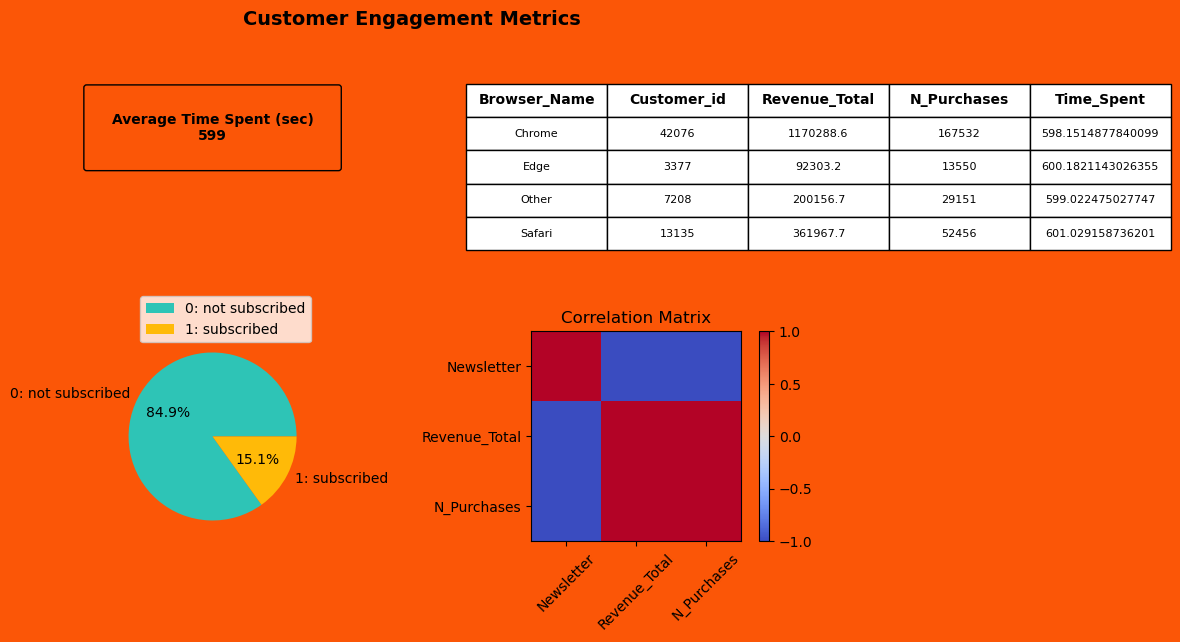

In [125]:
# Create a 2x2 figure with a size of 10x6 inches
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))

# Add a text box to the first subplot with the average time spent on the website
ax[0,0].text(0.5,0.77, f"Average Time Spent (sec)\n{str(avg_Time_Spent_rounded)}", ha='center', va='center', fontsize=10, fontweight='bold', bbox= dict(facecolor='#fb5607', edgecolor='black', pad=2, boxstyle='round, rounding_size=0.2'))

# Remove the axis ticks and labels from the first subplot
ax[0,0].axis('off')

# Create a table from the preferred_browser dataframe and add it to the second subplot
table_data = [preferred_browser.columns.tolist()] + preferred_browser.values.tolist()
preferred_browser_table = ax[0,1].table(cellText=table_data, colWidths=[0.2]*len(preferred_browser.columns), cellLoc='center', loc='upper left')
preferred_browser_table.auto_set_font_size(False)
preferred_browser_table.set_fontsize(8)
preferred_browser_table.scale(2,2)
for (row, col), cell in preferred_browser_table.get_celld().items():
    if (row == 0):
        cell.set_text_props(fontproperties=FontProperties(weight='bold'))

# Remove the axis ticks and labels from the second subplot   
ax[0,1].axis('off')

# Add a pie chart to the third subplot showing the percentage of newsletter subscribers
labels = [ '0: not subscribed', '1: subscribed']
colors = ['#2ec4b6', '#ffba08']
ax[1,0].pie(newsletter_subscribers, labels=labels, colors =colors, autopct='%1.1f%%')
ax[1,0].legend(loc='upper right', bbox_to_anchor=(1.0, 1.2));

# Select the newsletter_subscription dataframe
x = newsletter_subscription

# Create a correlation matrix from the newsletter_subscription dataframe
correlation_matrix = x.corr()

# Display the correlation matrix
heatmap = ax[1,1].imshow(correlation_matrix, cmap='coolwarm')
ax[1,1].set_xticks(range(len(correlation_matrix.columns)))
ax[1,1].set_yticks(range(len(correlation_matrix.columns)))
ax[1,1].set_xticklabels(correlation_matrix.columns, rotation=45)
ax[1,1].set_yticklabels(correlation_matrix.columns)
ax[1,1].set_title('Correlation Matrix')
plt.colorbar(heatmap)

# Customize the layout of the figure
fig.suptitle('Customer Engagement Metrics', ha='center', va='center', fontsize=14, fontweight='bold')
fig.patch.set_facecolor('#fb5607')





**ANSWER**: Customers spend an average of **599** seconds on the retail shop's website. The most preferred browser for transactions is **Chrome**, chosen by **42K** customers. Only **15.1%** (9.9K) of customers subscribed to the retail shop's newsletter. **Newsletter subscription** is negatively correlated with customers' spending behavior. Customers who subscribed to the newsletter made lower **revenues** and **purchases** compared to non-subscribers."

---

Cheers!, that concludes our analysis. Thank you for your time and attention!